<a href="https://colab.research.google.com/github/christyuda/BlastingWA/blob/main/cek_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Quality Report:
virtual_account Kosong: 110
email Kosong: 14
Handphone Kosong: 13
HandphoneOrtu Kosong: 120
Tahun Masuk Kosong: 7
Invalid Handphone Format: 583


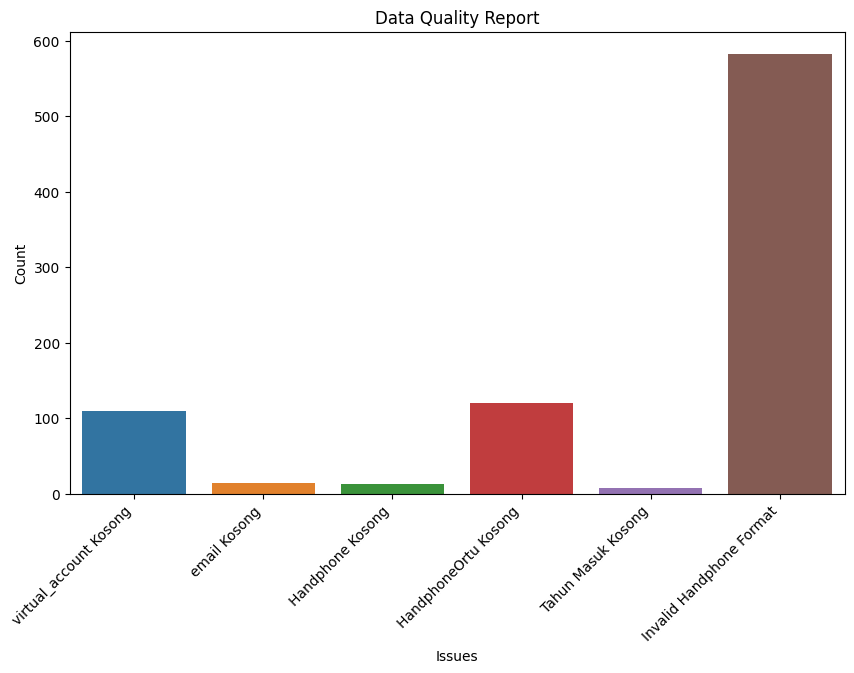

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data dari file CSV
file_path = 'datavokasi2023.csv'
df = pd.read_csv(file_path)

# Buat fungsi untuk memeriksa data yang kosong atau tidak sesuai
def check_data_quality(dataframe):
    report = {}

    # Mengecek kolom dengan data kosong
    empty_columns = dataframe.columns[dataframe.isnull().any()]
    for col in empty_columns:
        report[f'{col} Kosong'] = dataframe[col].isnull().sum()

    # Mengecek data yang tidak sesuai (contoh: Handphone dengan format '628')
    invalid_phone_format = dataframe['Handphone'].str.match(r'^628\d{9,}$', na=False)
    report['Invalid Handphone Format'] = invalid_phone_format.sum()

    return report

# Membuat laporan
data_quality_report = check_data_quality(df)

# Menampilkan laporan
print("Data Quality Report:")
for issue, count in data_quality_report.items():
    print(f"{issue}: {count}")

# Visualisasi data quality report menggunakan grafik
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(data_quality_report.keys()), y=list(data_quality_report.values()), ax=ax)
plt.title("Data Quality Report")
plt.xlabel("Issues")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()
